In [8]:
pip install pmdarima

  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

In [20]:
data=pd.read_csv('C:/Users/suhas/Downloads/Residential.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29231 entries, 0 to 29230
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        29231 non-null  object 
 1   hour        29231 non-null  int64  
 2   energy_kWh  29231 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 685.2+ KB


In [22]:
data.head()

,date,hour,energy_kWh
0,01-06-2012,1,1.011
1,01-06-2012,2,0.451
2,01-06-2012,3,0.505
3,01-06-2012,4,0.441
4,01-06-2012,5,0.468


In [25]:
data['date'][0]

'01-06-2012'

In [26]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\suhas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-06-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\suhas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-06-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\suhas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-06-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\suhas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-06-2012' in DD/MM/YYYY format. Provide format or specif

In [28]:
data = data.set_index(data['date'])

In [29]:
data['date'][0]

Timestamp('2012-01-06 00:00:00')

In [30]:
ts_data=data.set_index(data['date'])

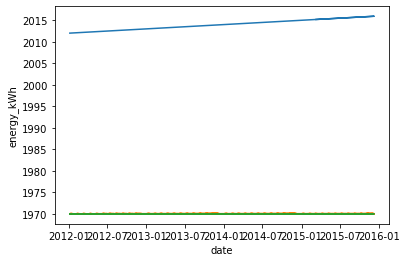

In [32]:
plt.xlabel("date")
plt.ylabel("energy_kWh")
plt.plot(ts_data)

C:\Users\suhas\AppData\Local\Temp\ipykernel_23948\2756288813.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  rol_mean = ts_data.rolling(window=12).mean()
C:\Users\suhas\AppData\Local\Temp\ipykernel_23948\2756288813.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  rol_std = ts_data.rolling(window=12).std()


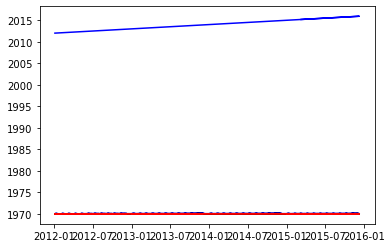

In [33]:
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

In [35]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts_data['hour'])
print(dftest)

(-26.451907179765584, 0.0, 50, 29180, {'1%': -3.430574121842026, '5%': -2.8616390556938454, '10%': -2.566822724340801}, 67152.72447022918)


In [39]:
data['date'] = pd.to_numeric(pd.to_datetime(data['date']))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data.iloc[-200:].values,model='Additive',period=24)

trend = decompose.trend
season = decompose.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [41]:
ts_data

,date,hour,energy_kWh
date,,,
2012-01-06,2012-01-06,1,1.011
2012-01-06,2012-01-06,2,0.451
2012-01-06,2012-01-06,3,0.505
2012-01-06,2012-01-06,4,0.441
2012-01-06,2012-01-06,5,0.468
...,...,...,...
2015-02-10,2015-02-10,20,2.101
2015-02-10,2015-02-10,21,1.646
2015-02-10,2015-02-10,22,1.319


In [42]:
ts_data_new = ts_data['hour'] - ts_data['hour'].shift(2)

In [43]:
ts_data_new

date
2012-01-06     NaN
2012-01-06     NaN
2012-01-06     2.0
2012-01-06     2.0
2012-01-06     2.0
              ... 
2015-02-10     2.0
2015-02-10     2.0
2015-02-10     2.0
2015-02-10     2.0
2015-03-10   -22.0
Name: hour, Length: 29231, dtype: float64

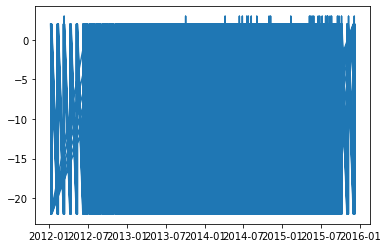

In [44]:
plt.plot(ts_data_new)

In [45]:
adfuller(ts_data_new.dropna())

(-44.7875854051131,
 0.0,
 50,
 29178,
 {'1%': -3.4305741372057628,
  '5%': -2.8616390624839387,
  '10%': -2.5668227279550058},
 67862.31698845745)

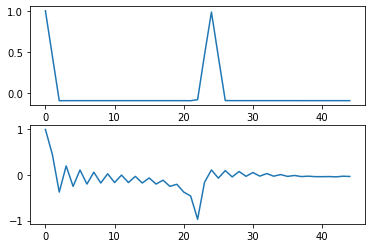

In [46]:
from statsmodels.tsa.stattools import acf, pacf

acf_plot = acf(ts_data_new.dropna())
pacf_plot = pacf(ts_data_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [ ]:
model = ARIMA(ts_data, order=(1,0,0))
model_fit = model.fit()

In [ ]:
model_fit.forecast(24)

In [ ]:
res = model_fit.forecast(24)

In [ ]:
res = pd.DataFrame(res)
res.columns = ['hour']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)

plt.plot(ts_data_pred)